<a href="https://colab.research.google.com/github/Mayuresh1611/ML-AI-projects/blob/main/MovieGrossPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Box-Office Collection Predictor 🎥**

In this project I have used Linear Regression to predict the Worldwide box-office collection of the moveis. The data used for this project contains 42380 movies ranging from 1940 to 2022.

In [2]:
import pandas as pd
import numpy as np

Importing required dataset

In [3]:

df = pd.read_csv('movie_statistic_dataset.csv',
                 encoding='latin-1')

Dataset contains 4380 examples and 14 features. But we don't need every feature to train the model.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   object 
 3   runtime_minutes       4380 non-null   float64
 4   director_name         4380 non-null   object 
 5   director_professions  4380 non-null   object 
 6   director_birthYear    4380 non-null   object 
 7   director_deathYear    4380 non-null   object 
 8   movie_averageRating   4380 non-null   float64
 9   movie_numerOfVotes    4380 non-null   float64
 10  approval_Index        4380 non-null   float64
 11  Production budget $   4380 non-null   int64  
 12  Domestic gross $      4380 non-null   int64  
 13  Worldwide gross $     4380 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 479.2+ KB


## Feature Selection
We will use **Production budget, Movie rating and genres.** Other features are not so important. Although We can also include the director names but it would create lot of randomness in the data resulting in poor prediction for new directors.

### Visualization of the data
We visualize the data of production budget and rating. But visualizing the data alone will not help! We need to find the correation between the data.

In [5]:
plt.scatter(df['movie_averageRating'], df['Production budget $'], c=df['Worldwide gross $'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Worldwide Gross $')  # Add colorbar with label
plt.xlabel('Rating')
plt.ylabel('Production Budget ($)')
plt.title('Scatter Plot: Worldwide Gross vs Rating and Production Budget')
plt.show()

NameError: name 'plt' is not defined

We Check the correlation between the data using following function

In [6]:
def correlation(X, Y):
    correlation_coefficient = np.corrcoef(X, Y)[0, 1]
    print(correlation_coefficient)

Correlation of the rating and production budget to the worldwide gross as follows

In [7]:
correlation(df['Production budget $'], df['Worldwide gross $'])
correlation(df['movie_averageRating'], df['Worldwide gross $'])

0.7330837441109731
0.22204523637747348


Relation between the produciton budhet and gross collection is very strong compated to the rating.

We Introduce new feature to increase the correlation of the data. We multiply rating and production budget. Which has strong relationship with the target data.


In [8]:
newFeature = pd.DataFrame({'ratingxproduction': df['movie_averageRating'] * df['Production budget $'] })
correlation(newFeature['ratingxproduction'], df['Worldwide gross $'])

0.7744465306268935


We insert this feature into the dataset for training purpose.

In [9]:
df.insert(4 , column="rating x production" , value = newFeature)

## Feture Encoding

We first seperate each genre from the 3 genres combined together in string object. Then we store these in the set to avoid storing duplicates. Then we turn the set into list to get access of their index.  

In [10]:
UnfilteredGenres = list(set(df['genres'].unique()))
genres = set()
for i in range(len(UnfilteredGenres)):
  lis = UnfilteredGenres[i].split(",")
  for j in lis:
    genres.add(j)


In [11]:
print(list(genres))
genres = list(genres)

['Western', 'Fantasy', 'War', 'Documentary', 'Drama', 'Horror', 'Animation', 'Romance', 'Adventure', 'Crime', 'Comedy', 'Film-Noir', 'History', '\\N', 'Sci-Fi', 'Biography', 'Family', 'Thriller', 'Sport', 'Music', 'Action', 'Mystery', 'Musical', 'News']


After genreating such list we now add up the ith positione of that genre from the list to get combinations of the genre specified in the data example.

In [12]:
GenreData = list(df['genres'])
FilteredGenres = []

for data in GenreData:
  sum = 0
  categories = data.split(",")
  for j in categories:
    sum += genres.index(j) + 1
  FilteredGenres.append(sum)

print(FilteredGenres , len(FilteredGenres))

df["genres"] = pd.DataFrame(FilteredGenres)

[32, 35, 32, 45, 45, 32, 48, 45, 45, 45, 21, 27, 45, 36, 41, 47, 2, 11, 49, 48, 32, 45, 26, 32, 52, 36, 45, 47, 31, 45, 45, 45, 45, 41, 45, 45, 45, 35, 35, 28, 54, 32, 45, 13, 37, 45, 27, 27, 27, 32, 45, 45, 36, 28, 25, 48, 2, 27, 28, 45, 45, 27, 45, 48, 49, 45, 32, 45, 32, 28, 45, 37, 41, 45, 28, 27, 32, 45, 32, 32, 49, 45, 36, 13, 45, 36, 27, 45, 36, 30, 27, 32, 45, 28, 48, 45, 41, 37, 41, 28, 28, 42, 35, 31, 32, 45, 45, 42, 45, 45, 31, 27, 45, 32, 27, 27, 6, 37, 27, 45, 47, 32, 30, 45, 37, 35, 28, 26, 45, 41, 36, 45, 35, 27, 35, 36, 32, 28, 32, 47, 45, 28, 45, 27, 32, 37, 37, 27, 29, 35, 45, 28, 32, 27, 45, 45, 45, 36, 15, 47, 48, 32, 39, 54, 32, 42, 35, 39, 45, 27, 32, 27, 27, 47, 28, 36, 27, 28, 32, 37, 27, 32, 36, 39, 23, 27, 36, 37, 37, 45, 36, 45, 27, 48, 61, 5, 47, 27, 37, 27, 35, 32, 37, 19, 44, 27, 13, 32, 4, 41, 37, 45, 37, 27, 37, 27, 27, 37, 41, 34, 48, 45, 45, 45, 37, 49, 45, 26, 35, 28, 45, 32, 45, 48, 45, 45, 36, 37, 27, 35, 37, 35, 27, 41, 27, 40, 37, 28, 45, 27, 45, 

Thus we replace the old genre data to new Encoded form of the data.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_title           4380 non-null   object 
 1   production_date       4380 non-null   object 
 2   genres                4380 non-null   int64  
 3   runtime_minutes       4380 non-null   float64
 4   rating x production   4380 non-null   float64
 5   director_name         4380 non-null   object 
 6   director_professions  4380 non-null   object 
 7   director_birthYear    4380 non-null   object 
 8   director_deathYear    4380 non-null   object 
 9   movie_averageRating   4380 non-null   float64
 10  movie_numerOfVotes    4380 non-null   float64
 11  approval_Index        4380 non-null   float64
 12  Production budget $   4380 non-null   int64  
 13  Domestic gross $      4380 non-null   int64  
 14  Worldwide gross $     4380 non-null   int64  
dtypes: float64(5), int64(

## Training the model

We are using scikit learn library to train the model. Before training the data
## variable scaling
we are scaling the vairables using Robust scaler as there are potential outliers in the data which are needed to be handled precisely for better result.
## Adding polynomial
Added polynomial of degree 2 to the data to make model perfrom better and restrainig model form underfitting.

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler , PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# X and Y are the variables for which you want to perform linear regression

# Extract the independent variable(s) X and the dependent variable Y
# Assuming "Production budget $" and "Worldwide gross $" are columns in your DataFrame df
X = df[['Production budget $', "genres" , 'movie_averageRating' , 'rating x production']]
Y = df['Worldwide gross $']

scaler = RobustScaler()
X = scaler.fit_transform(X)


def getDegree (CV , Train ):
  n = CV.shape
  min = float('-inf')
  for i in range(n):
    val = CV[i] - Train[i]
    if val < min:
      degree = i+1
      min = val

  return degree

# Split the data into training and testing sets
maxDegree = 3

errCV = np.zeros(maxDegree)
errTrain = np.zeros(maxDegree)

for dg in range(maxDegree):
  poly = PolynomialFeatures(degree= dg + 1)
  X = poly.fit_transform(X)

  X_train, X_val , Y_train, Y_val = train_test_split(X, Y, test_size=0.3)


  model = LinearRegression()

  # Fit the model on the training set
  model.fit(X_train, Y_train)

  # Make predictions on the test set
  Y_pred = model.predict(X_train)
  Ypcv= model.predict(X_val)
  mseT = metrics.mean_squared_error(Y_train, Y_pred)
  mseCV = metrics.mean_squared_error(Y_val, Ypcv)

  print(mseT , mseCV , dg+1)

  errTrain[dg] += mseT
  errCV[dg] += mseCV

1.5545506172587914e+16 1.4002136489349652e+16 1
1.3214926949397984e+16 1.722979331610157e+16 2
1.1347686397406918e+16 1.0264198689981466e+18 3


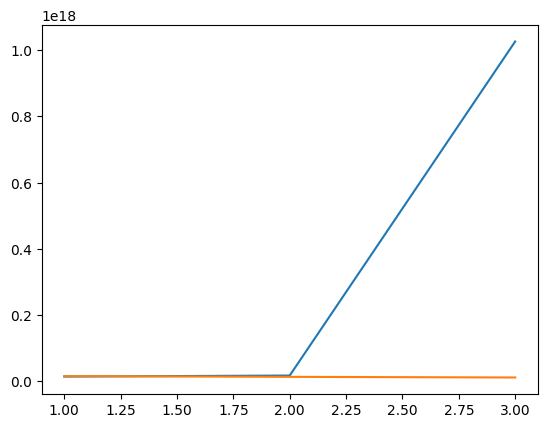

In [42]:
plt.plot( [1 , 2 , 3] , errCV ,  label = "CV")
plt.plot([1 , 2 , 3] , errTrain , label = "Train")
plt.show()

Best polynomial choice is of degree 1

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler , PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# X and Y are the variables for which you want to perform linear regression

# Extract the independent variable(s) X and the dependent variable Y
# Assuming "Production budget $" and "Worldwide gross $" are columns in your DataFrame df
X = df[['Production budget $', "genres" , 'movie_averageRating' , 'rating x production']]
Y = df['Worldwide gross $']

scaler = RobustScaler()
X = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=1)
X = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_train)
Ypcv= model.predict(X_val)
Ypt= model.predict(X_test)

# Evaluate the model using regression metrics
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred))
print('CV Mean Squared Error:', metrics.mean_squared_error(Y_val, Ypcv))
print('test Mean Squared Error:', metrics.mean_squared_error(Y_test, Ypt))




Mean Squared Error: 1.635438285396469e+16
CV Mean Squared Error: 1.1698739418745408e+16
test Mean Squared Error: 1.2202420085677752e+16


This was the best result I was able to acheive after failing on neural networks, KNN,  RandomForest as they performed poor and had high variances compared to the linear regression.

## Prediction on New data

Function below helps predicting the Worldwide grossing of the movies based on the new custom data.

In [57]:
def predictNewData(budget, ingenre, rating):
    # Assuming genres is a list of unique genres used during training
    genre = 0
    # Feature encoding for genre
    for i in ingenre:
      genre += genres.index(i) + 1

    # Create a DataFrame with the new data
    X = pd.DataFrame([[budget, genre, rating, rating * budget]])

    # Use the same scaler and polynomial features as used during training
    X_scaled = scaler.transform(X)  # Use the same scaler instance used during training
    X_poly = poly.transform(X_scaled)  # Use the same polynomial features instance used during training

    # Make predictions
    val = model.predict(X_poly)
    return val

In [61]:
predictNewData(125000000 , ["Action" , "Animation" , "Adventure"] , 8.6) #data based on movie Spiderman across the spiderverse (2023)
# It grossed 700 mil $

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([6.70568563e+08])

## This model mostly gives near round about prediction! Although they are not 100% accurate!

# Thank You